UNZIP THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

In [ ]:
import os
import requests
import zipfile

def download_file(url, save_path):
    response = requests.get(url, stream=True)
    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"Downloaded file saved at {save_path}")

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Unzipped files to {extract_to}")
    os.remove(zip_path)
    print(f"Deleted zip file at {zip_path}")

def main():
    url = 'https://figshare.com/ndownloader/files/48018562'
    download_path = 'downloaded_file.zip'

    download_file(url, download_path)
    unzip_file(download_path, os.getcwd())

if __name__ == '__main__':
    main()

Downloaded file saved at downloaded_file.zip
Unzipped files to /content
Deleted zip file at downloaded_file.zip


In [ ]:
!pip install gdown

import gdown

# Google Drive file ID (extracted from the link)
file_id = "1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG"
destination = "Eval_metrics_gen_excel.py"  # Change this to your desired filename

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG
From (redirected): https://drive.google.com/uc?id=1bTEGD6xFVfi7Hf4UGzrbj4BDSDchwhgG&confirm=t&uuid=a5bb2bcb-e992-4587-b281-4822913aa0bb
To: /content/Eval_metrics_gen_excel.py
100%|██████████| 3.56k/3.56k [00:00<00:00, 4.87MB/s]


'Eval_metrics_gen_excel.py'

RESNET 50 MODEL TRAINING UPTO 10 EPOCHS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from concurrent.futures import ThreadPoolExecutor

train data loaded
val data loaded
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.2381 - loss: 2.7018 - val_accuracy: 0.6320 - val_loss: 1.4683
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5573 - loss: 1.2466 - val_accuracy: 0.7170 - val_loss: 1.2336
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6937 - loss: 0.8331 - val_accuracy: 0.7194 - val_loss: 1.0612
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7703 - loss: 0.5458 - val_accuracy: 0.7245 - val_loss: 0.9621
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8230 - loss: 0.3738 - val_accuracy: 0.7240 - val_loss: 0.9104
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8612 - loss: 0.2540 - val_accuracy: 0.7309 - val_loss: 0.8739
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8885 - loss: 0.1782 - val_accuracy: 0.7295 - val_loss: 0.8609
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9007 - loss: 0.1413 

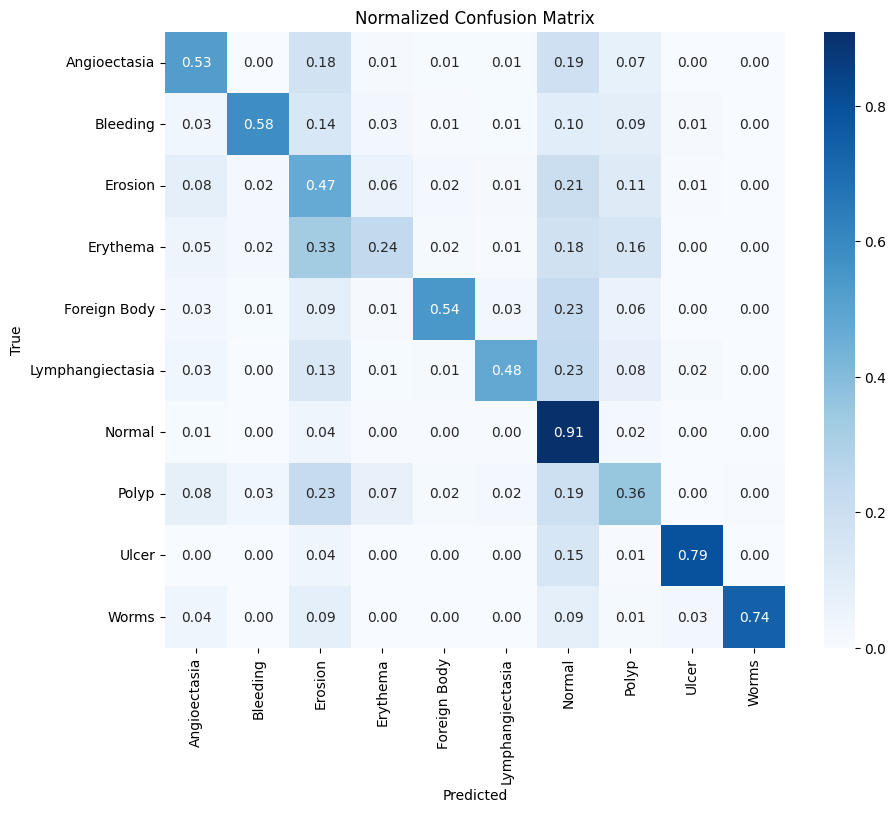

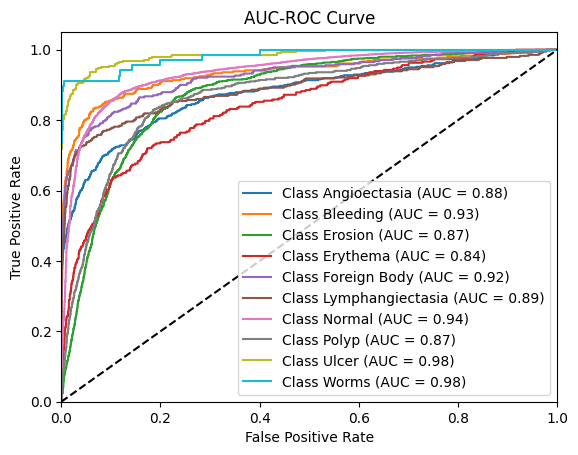

In [ ]:
def load_and_preprocess_image(base_dir, path, target_size):
    img_path = os.path.join(base_dir, path.replace('\\', '/'))
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    preprocessed_img = preprocess_input(img_array)
    return preprocessed_img

def get_data_for_training(excel_path, base_dir, image_size=(32, 32)):
    df = pd.read_excel(excel_path)
    df = df.dropna(subset=['image_path'])
    class_names = df.columns[2:]
    X = np.array([load_and_preprocess_image(base_dir, path, image_size) for path in df['image_path'].values])
    y = df[class_names].values
    return X, y, df['image_path'].values

if __name__ == "__main__":
    train_excel_path = "/content/Dataset/training/training_data.xlsx"
    val_excel_path = "/content/Dataset/validation/validation_data.xlsx"
    base_dir = "/content/Dataset"
    image_size = (32, 32)
    batch_size = 4096
    epochs = 30

    # Load data for training and validation
    X_train, y_train, _ = get_data_for_training(train_excel_path, base_dir, image_size=image_size)
    print("train data loaded")
    X_val, y_val, image_paths = get_data_for_training(val_excel_path, base_dir, image_size=image_size)
    print("val data loaded")

    # Calculate class weights
    class_names = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']
    y_train_labels = np.argmax(y_train, axis=1)
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
    class_weights_dict = dict(enumerate(class_weights))

    #Build the model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(class_names), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights_dict
    )

    # Predict on the validation set
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    # Save validation predictions to an Excel file
    results_df = pd.DataFrame({
        'Image_path': image_paths,
        'actual_class': y_val_classes,
        'predicted_class': y_pred_classes
    })
    results_file_path = os.path.join(base_dir, "results.xlsx")
    results_df.to_excel(results_file_path, index=False, sheet_name='Sheet1')

    # Print the confusion matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val_classes, y_pred_classes, normalize='true')
    print(cm)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_val_classes, y_pred_classes))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    # Plot AUC-ROC curve
    lb = LabelBinarizer()
    y_val_bin = lb.fit_transform(y_val_classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_val_bin[:, i], y_pred[:, i])

    plt.figure()
    for i in range(len(class_names)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
class_names = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']

# Binarize the true labels
lb = LabelBinarizer()
y_val_bin = lb.fit_transform(y_val_classes)

# Calculate AUC scores for each class
roc_auc = dict()
for i in range(len(class_names)):
    roc_auc[class_names[i]] = roc_auc_score(y_val_bin[:, i], y_pred[:, i])

# Print mean AUC score for each class
for class_name in class_names:
    print(f'Mean AUC for {class_name}: {roc_auc[class_name]:.2f}')


Mean AUC for Angioectasia: 0.88
Mean AUC for Bleeding: 0.93
Mean AUC for Erosion: 0.87
Mean AUC for Erythema: 0.84
Mean AUC for Foreign Body: 0.92
Mean AUC for Lymphangiectasia: 0.89
Mean AUC for Normal: 0.94
Mean AUC for Polyp: 0.87
Mean AUC for Ulcer: 0.98
Mean AUC for Worms: 0.98


SAVING THE MODEL

In [ ]:
import pickle

In [ ]:
base_dir = "/content/"
# Save the trained model using pickle
model_filename = os.path.join(base_dir, 'trained_model_resnet50.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)
print(f"Model saved to {model_filename}")

Model saved to /content/trained_model_resnet50.pkl


In [ ]:
import pickle

# Load the trained model
model_filename = "/content/trained_model_resnet50.pkl"
with open(model_filename, 'rb') as model_file:
    model = pickle.load(model_file)
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(224, 224)):
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array and normalize it
    img_array = image.img_to_array(img) / 255.0

    # Expand dimensions to match the input shape of the model (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

In [ ]:
def predict_disease(model, img_path, class_names):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the disease label
    predicted_disease = class_names[predicted_class_index]

    return predicted_disease

In [ ]:
# Define the class names (same as during training)
class_names = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']

# Path to the test image
img_path = "/content/Dataset/validation/Foreign Body/KVASIR/3ada4222967f421d_10589.jpg"  # Replace with the path to your test image

# Predict the disease
predicted_disease = predict_disease(model, img_path, class_names)
print(f'Predicted Disease: {predicted_disease}')

ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(1, 224, 224, 3)

In [ ]:
import pickle
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model_filename = "/content/trained_model_resnet50.pkl"
with open(model_filename, 'rb') as model_file:
    model = pickle.load(model_file)
print("Model loaded successfully.")

# Define the class names
class_names = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']

# Function to preprocess the image
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(32, 32)):
    """
    Preprocess the image by resizing and normalizing it.
    """
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array and normalize it
    img_array = image.img_to_array(img) / 255.0

    # Expand dimensions to match the input shape of the model (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Function to predict the disease
def predict_disease(model, img_path, class_names):
    """
    Predict the disease class for a given image.
    """
    # Preprocess the image
    img_array = preprocess_image(img_path, target_size=(32, 32))

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the disease label
    predicted_disease = class_names[predicted_class_index]

    return predicted_disease

# Path to the test image
# Define the class names (same as during training)


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Disease: Normal


In [ ]:
class_names = ['Angioectasia', 'Bleeding', 'Erosion', 'Erythema', 'Foreign Body', 'Lymphangiectasia', 'Normal', 'Polyp', 'Ulcer', 'Worms']

# Path to the test image
img_path = "/content/Dataset/validation/Erosion/KVASIR/0531325b64674948_233.jpg"  # Replace with the path to your test image

# Predict the disease
predicted_disease = predict_disease(model, img_path, class_names)
print(f'Predicted Disease: {predicted_disease}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Disease: Normal
